# Relax Inc

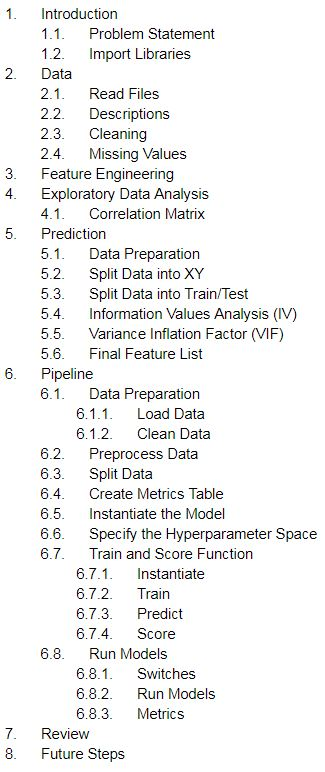

In [1]:
# outline picture
from IPython.display import Image
Image(filename='project_outline_2019_05_22.jpg')

# 1) Introduction

## 1.1) Problem Statement

12,000 users signed up for a product in the last two years. The user table describes each user across 9 features. The engagement table details when each user signed at a certain day and time. An adopted user is defined as a user who has logged into the product on three separate days in at least one seven day period. Once the user is identified as adopted or not, indentify which features predict user adoption.

## 1.2) Import Libraries

In [2]:
# libraries

import chardet # check encoding for csv file

import pandas as pd
import numpy as np
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

# 2) Data

## 2.1) Read Files

### 2.1.1) takehome_users

In [3]:
# check encoding for csv file
with open('takehome_users.csv', 'rb') as f:
    result = chardet.detect(f.read())
    
# read file
tu_raw = pd.read_csv('takehome_users.csv', 
                 index_col=0, 
                 encoding=result['encoding'])

# copy the df to edit
tu = tu_raw.copy()

tu.head(10)

,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
object_id,,,,,,,,,
1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0
6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,1.387424e+09,0,0,197,11241.0
7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,1.356010e+09,0,1,37,NaN
8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaN,1,1,74,NaN
9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaN,0,0,302,NaN


In [4]:
tu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 1 to 12000
Data columns (total 9 columns):
creation_time                 12000 non-null object
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
dtypes: float64(2), int64(3), object(4)
memory usage: 937.5+ KB


In [5]:
tu.describe()

,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
count,8.823000e+03,12000.000000,12000.000000,12000.000000,6417.000000
mean,1.379279e+09,0.249500,0.149333,141.884583,5962.957145
std,1.953116e+07,0.432742,0.356432,124.056723,3383.761968
min,1.338452e+09,0.000000,0.000000,0.000000,3.000000
25%,1.363195e+09,0.000000,0.000000,29.000000,3058.000000
50%,1.382888e+09,0.000000,0.000000,108.000000,5954.000000
75%,1.398443e+09,0.000000,0.000000,238.250000,8817.000000
max,1.402067e+09,1.000000,1.000000,416.000000,11999.000000


### 2.1.2) takehome_user_engagement

In [6]:
# check encoding for csv file
with open('takehome_user_engagement.csv', 'rb') as f:
    result = chardet.detect(f.read())
    
# read file
tue_raw = pd.read_csv('takehome_user_engagement.csv', 
                 index_col=0, # set time_stamp col to index later
                 encoding=result['encoding'])

# copy the df to edit
tue = tue_raw.copy()

tue.head()

,user_id,visited
time_stamp,,
2014-04-22 03:53:30,1,1
2013-11-15 03:45:04,2,1
2013-11-29 03:45:04,2,1
2013-12-09 03:45:04,2,1
2013-12-25 03:45:04,2,1


In [7]:
tue.info()

<class 'pandas.core.frame.DataFrame'>
Index: 207917 entries, 2014-04-22 03:53:30 to 2014-01-26 08:57:12
Data columns (total 2 columns):
user_id    207917 non-null int64
visited    207917 non-null int64
dtypes: int64(2)
memory usage: 4.8+ MB


In [8]:
tue.describe()

,user_id,visited
count,207917.000000,207917.0
mean,5913.314197,1.0
std,3394.941674,0.0
min,1.000000,1.0
25%,3087.000000,1.0
50%,5682.000000,1.0
75%,8944.000000,1.0
max,12000.000000,1.0


## 2.2) Descriptions

### 2.2.1) takehome_users

- object_id:   the  user's  id
- creation_time:  when  they  created  their  account
- name:  the  user's  name
- email:  email  address
- creation_source:   how  their  account  was  created.  This  takes  on  one of  5  values:
    - PERSONAL_PROJECTS:  invited  to  join  another  user's personal  workspace
    - GUEST_INVITE:  invited  to  an  organization  as  a  guest (limited  permissions)
    - ORG_INVITE:  invited  to  an  organization  (as  a  full  member)
    - SIGNUP:  signed  up  via  the  website
    - SIGNUP_GOOGLE_AUTH:  signed  up  using  Google Authentication  (using  a  Google  email  account  for  their  login id)
- last_session_creation_time:   unix  timestamp  of  last  login
- opted_in_to_mailing_list:  whether  they  have  opted  into  receiving marketing  emails
- enabled_for_marketing_drip: whether  they  are  on  the  regular marketing  email  drip
- org_id:   the  organization  (group  of  users)  they  belong  to
- invited_by_user_id:   which  user  invited  them  to  join  (if  applicable).

### 2.2.2) takehome_user_engagement

- time_stamp: the date and time the user logged in
- user_id: the user's id
- visited: 1 for visited, 0 for not visited

## 2.3) Cleaning

### 2.3.1) takehome_users

In [9]:
# rename index name
tu.index.names = ['user_id']

In [10]:
# convert date columns to datetime
tu['creation_time'] = pd.to_datetime(tu['creation_time'])

# convert unix timestamp to datetime
tu['last_session_creation_time'] = pd.to_datetime(tu['last_session_creation_time'],unit='s')

In [11]:
# convert columns to category format

tu['creation_source'] = pd.Categorical(tu['creation_source'])
tu['opted_in_to_mailing_list'] = pd.Categorical(tu['opted_in_to_mailing_list'])
tu['enabled_for_marketing_drip'] = pd.Categorical(tu['enabled_for_marketing_drip'])
tu['org_id'] = pd.Categorical(tu['org_id'])

In [12]:
tu.head(10)

,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
user_id,,,,,,,,,
1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0
2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0
3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0
4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0
5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0
6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,2013-12-19 03:37:06,0,0,197,11241.0
7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,2012-12-20 13:24:32,0,1,37,NaN
8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaT,1,1,74,NaN
9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaT,0,0,302,NaN


In [13]:
tu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 1 to 12000
Data columns (total 9 columns):
creation_time                 12000 non-null datetime64[ns]
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null category
last_session_creation_time    8823 non-null datetime64[ns]
opted_in_to_mailing_list      12000 non-null category
enabled_for_marketing_drip    12000 non-null category
org_id                        12000 non-null category
invited_by_user_id            6417 non-null float64
dtypes: category(4), datetime64[ns](2), float64(1), object(2)
memory usage: 644.7+ KB


### 2.3.2) takehome_user_engagement

In [14]:
# convert columns to datetime
tue.index = pd.to_datetime(tue.index)

In [15]:
# convert columns to category format
tue['visited'] = pd.Categorical(tue['visited'])

In [16]:
tue.head()

,user_id,visited
time_stamp,,
2014-04-22 03:53:30,1,1
2013-11-15 03:45:04,2,1
2013-11-29 03:45:04,2,1
2013-12-09 03:45:04,2,1
2013-12-25 03:45:04,2,1


In [17]:
tue.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 207917 entries, 2014-04-22 03:53:30 to 2014-01-26 08:57:12
Data columns (total 2 columns):
user_id    207917 non-null int64
visited    207917 non-null category
dtypes: category(1), int64(1)
memory usage: 3.4 MB


## 2.4) Missing Values

### 2.4.1) takehome_users

In [18]:
# list all columns with missing values
tu_miss = tu.columns[tu.isna().any()].tolist()
tu_miss

['last_session_creation_time', 'invited_by_user_id']

In [19]:
# show example of columns with missing values
tu[tu_miss].head(10)

,last_session_creation_time,invited_by_user_id
user_id,,
1,2014-04-22 03:53:30,10803.0
2,2014-03-31 03:45:04,316.0
3,2013-03-19 23:14:52,1525.0
4,2013-05-22 08:09:28,5151.0
5,2013-01-22 10:14:20,5240.0
6,2013-12-19 03:37:06,11241.0
7,2012-12-20 13:24:32,NaN
8,NaT,NaN
9,NaT,NaN


In [20]:
# handle/address missing values
# last_session_creation_time
# NaT = the user signed up but never signed in

ls_nat_num = tu['last_session_creation_time'].isna().sum()
ls_nat_perc = ls_nat_num / tu.shape[0]
ls_remain = tu.shape[0] - ls_nat_num

print('Column: Last Session Creation Time')
print('Number of NaT values:', ls_nat_num)
print('Percent of NaT values:', ls_nat_perc*100,'%')
print('Number of Remaining Values:',ls_remain)

# drop rows with NaT values
tu = tu.dropna(subset=['last_session_creation_time'])
print('Verified Remaining Values:', tu.shape)

Column: Last Session Creation Time
Number of NaT values: 3177
Percent of NaT values: 26.475 %
Number of Remaining Values: 8823
Verified Remaining Values: (8823, 9)


In [21]:
# handle/address missing values
# invited_by_user_id 

# NaN = the user wasn't invited by another user

# set NaN value to 0
tu['invited_by_user_id'].fillna(0, inplace=True)

# convert float to int
tu['invited_by_user_id'] = tu['invited_by_user_id'].astype(int) 

tu.head(10)

,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
user_id,,,,,,,,,
1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803
2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316
3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525
4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151
5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240
6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,2013-12-19 03:37:06,0,0,197,11241
7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,2012-12-20 13:24:32,0,1,37,0
10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,2014-06-03 22:08:03,1,1,318,4143
11,2013-12-26 03:55:54,Paulsen Malthe,MaltheAPaulsen@gustr.com,SIGNUP,2013-12-27 03:55:54,0,0,69,0


In [22]:
tu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8823 entries, 1 to 12000
Data columns (total 9 columns):
creation_time                 8823 non-null datetime64[ns]
name                          8823 non-null object
email                         8823 non-null object
creation_source               8823 non-null category
last_session_creation_time    8823 non-null datetime64[ns]
opted_in_to_mailing_list      8823 non-null category
enabled_for_marketing_drip    8823 non-null category
org_id                        8823 non-null category
invited_by_user_id            8823 non-null int32
dtypes: category(4), datetime64[ns](2), int32(1), object(2)
memory usage: 445.8+ KB


### 2.4.2) takehome_user_engagement

In [23]:
# handle/address missing values
# list all columns with missing values
tue_miss = tue.columns[tue.isna().any()].tolist()

if(len(tue_miss) == 0):
    print ('There are no missing values')
else:
    print(tue_miss)

There are no missing values


# 3) Feature Engineering

## 3.1) takehome_users

- object_id: NONE
- creation_time: year, month, day, day of the week, weekday/weekend, etc.
- name: NONE
- email: host (gmail, yahoo, etc.)
- creation_source: NONE
- last_session_creation_time: year, month, day, day of the week, weekday/weekend, etc.
- opted_in_to_mailing_list: NONE
- enabled_for_marketing_drip: NONE
- org_id: NONE
- invited_by_user_id: invited vs. not invited

### 3.1.1) Creation Time

In [24]:
# creation_time: year, month, day, day of the week, weekday/weekend, etc.

tu['ct_year'] = pd.DatetimeIndex(tu['creation_time']).year
tu['ct_month'] = pd.DatetimeIndex(tu['creation_time']).month
tu['ct_day'] = pd.DatetimeIndex(tu['creation_time']).day
tu['ct_dow'] = tu['creation_time'].dt.dayofweek # Monday = 0 & Sunday = 6
tu['ct_we'] = np.where(tu['ct_dow']==5 , 1, 
                       np.where(tu['ct_dow']==6 , 1, 
                                np.where(tu['ct_dow'].isnull(), np.NaN, 0))) # weekend = 1, weekday = 0, NaN = NaN
tu['ct_we'] = tu['ct_we'].astype(int) # convert column from float to int


tu[['creation_time', 'ct_year', 'ct_month', 'ct_day', 'ct_dow', 'ct_we']].head(10)

,creation_time,ct_year,ct_month,ct_day,ct_dow,ct_we
user_id,,,,,,
1,2014-04-22 03:53:30,2014,4,22,1,0
2,2013-11-15 03:45:04,2013,11,15,4,0
3,2013-03-19 23:14:52,2013,3,19,1,0
4,2013-05-21 08:09:28,2013,5,21,1,0
5,2013-01-17 10:14:20,2013,1,17,3,0
6,2013-12-17 03:37:06,2013,12,17,1,0
7,2012-12-16 13:24:32,2012,12,16,6,1
10,2013-01-16 22:08:03,2013,1,16,2,0
11,2013-12-26 03:55:54,2013,12,26,3,0


In [25]:
tu['ct_we'].unique()

array([0, 1], dtype=int64)

### 3.1.2) Email

In [26]:
# extract host string from email column
tu['email_host'] = tu['email'].str.split('@').str.get(1)

# convert column to category format
tu['email_host'] = pd.Categorical(tu['email_host'])

tu[['email','email_host']].head()

,email,email_host
user_id,,
1,AugustCClausen@yahoo.com,yahoo.com
2,MatthewPoole@gustr.com,gustr.com
3,MitchellBottrill@gustr.com,gustr.com
4,NicklasSClausen@yahoo.com,yahoo.com
5,GraceRaw@yahoo.com,yahoo.com


In [27]:
# how many email_host categories
print('Number of Email Hosts:',len(tu['email_host'].cat.categories.tolist()))

Number of Email Hosts: 812


In [28]:
# examine email_host categories

# print top 10 categories in email_host
print('Top Ten Categories:')
print(tu['email_host'].value_counts().head(10))
print('')


# create list of categories
email_host_rank = tu['email_host'].value_counts().index.tolist()

# create list of top 6
email_host_top_six = email_host_rank[:6]

# create list to replace with 'other'
email_host_replace = email_host_rank[6:]

print('Top Six Categories:', email_host_top_six)
print('Number of Categories to be Replaced:', len(email_host_replace))

Top Ten Categories:
gmail.com         2930
yahoo.com         1726
jourrapide.com     883
gustr.com          842
cuvox.de           828
hotmail.com        803
oqpze.com            2
mumdc.com            2
luque.com            2
xvnbr.com            2
Name: email_host, dtype: int64

Top Six Categories: ['gmail.com', 'yahoo.com', 'jourrapide.com', 'gustr.com', 'cuvox.de', 'hotmail.com']
Number of Categories to be Replaced: 806


In [29]:
# create 'other' category for remaining email hosts

# add new category
tu['email_host'] = tu['email_host'].cat.add_categories(['other'])

# replace the rest of the categories with 'other'
tu['email_host'] = tu['email_host'].replace(email_host_replace, 'other')

# remove unused categories
tu['email_host'] = tu['email_host'].cat.remove_unused_categories()
print('Remaining Categories:')
print(tu['email_host'].value_counts())

Remaining Categories:
gmail.com         2930
yahoo.com         1726
jourrapide.com     883
gustr.com          842
cuvox.de           828
other              811
hotmail.com        803
Name: email_host, dtype: int64


In [30]:
tu[['email','email_host']].head(15)

,email,email_host
user_id,,
1,AugustCClausen@yahoo.com,yahoo.com
2,MatthewPoole@gustr.com,gustr.com
3,MitchellBottrill@gustr.com,gustr.com
4,NicklasSClausen@yahoo.com,yahoo.com
5,GraceRaw@yahoo.com,yahoo.com
6,EduardoPereiraCunha@yahoo.com,yahoo.com
7,TylerSewell@jourrapide.com,jourrapide.com
10,CarlaFerreiraSantos@gustr.com,gustr.com
11,MaltheAPaulsen@gustr.com,gustr.com


### 3.1.3) Last Session Creation Time

In [31]:
# last_session_creation_time: year, month, day, day of the week, weekday/weekend, etc.

tu['ls_year'] = pd.DatetimeIndex(tu['last_session_creation_time']).year
tu['ls_month'] = pd.DatetimeIndex(tu['last_session_creation_time']).month
tu['ls_day'] = pd.DatetimeIndex(tu['last_session_creation_time']).day
tu['ls_dow'] = tu['last_session_creation_time'].dt.dayofweek # Monday = 0 & Sunday = 6
tu['ls_we'] = np.where(tu['ls_dow']==5 , 1, 
                       np.where(tu['ls_dow']==6 , 1, 
                                np.where(tu['ls_dow'].isnull(), np.NaN, 0))) # weekend = 1, weekday = 0, NaN = NaN
tu['ls_we'] = tu['ls_we'].astype(int) # convert column from float to int

tu[['last_session_creation_time', 'ls_year', 'ls_month', 'ls_day', 'ls_dow', 'ls_we']].head(15)

,last_session_creation_time,ls_year,ls_month,ls_day,ls_dow,ls_we
user_id,,,,,,
1,2014-04-22 03:53:30,2014,4,22,1,0
2,2014-03-31 03:45:04,2014,3,31,0,0
3,2013-03-19 23:14:52,2013,3,19,1,0
4,2013-05-22 08:09:28,2013,5,22,2,0
5,2013-01-22 10:14:20,2013,1,22,1,0
6,2013-12-19 03:37:06,2013,12,19,3,0
7,2012-12-20 13:24:32,2012,12,20,3,0
10,2014-06-03 22:08:03,2014,6,3,1,0
11,2013-12-27 03:55:54,2013,12,27,4,0


In [32]:
tu['ls_we'].unique()

array([0, 1], dtype=int64)

### 3.1.4) Invited By User ID

In [33]:
# invited vs. not invited
# 1 = invited, 0 = not invited
tu['invited'] = np.where(tu['invited_by_user_id']==0, 0, 1)

# convert column to category format
tu['invited'] = pd.Categorical(tu['invited'])

tu[['invited_by_user_id','invited']].head(10)

,invited_by_user_id,invited
user_id,,
1,10803,1
2,316,1
3,1525,1
4,5151,1
5,5240,1
6,11241,1
7,0,0
10,4143,1
11,0,0


### 3.1.5) TU DataFrame after Feature Engineering

In [34]:
# entire tu df after feature engineering
tu.head(10)

,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,ct_year,...,ct_day,ct_dow,ct_we,email_host,ls_year,ls_month,ls_day,ls_dow,ls_we,invited
user_id,,,,,,,,,,,,,,,,,,,,,
1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803,2014,...,22,1,0,yahoo.com,2014,4,22,1,0,1
2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316,2013,...,15,4,0,gustr.com,2014,3,31,0,0,1
3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525,2013,...,19,1,0,gustr.com,2013,3,19,1,0,1
4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151,2013,...,21,1,0,yahoo.com,2013,5,22,2,0,1
5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240,2013,...,17,3,0,yahoo.com,2013,1,22,1,0,1
6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,2013-12-19 03:37:06,0,0,197,11241,2013,...,17,1,0,yahoo.com,2013,12,19,3,0,1
7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,2012-12-20 13:24:32,0,1,37,0,2012,...,16,6,1,jourrapide.com,2012,12,20,3,0,0
10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,2014-06-03 22:08:03,1,1,318,4143,2013,...,16,2,0,gustr.com,2014,6,3,1,0,1
11,2013-12-26 03:55:54,Paulsen Malthe,MaltheAPaulsen@gustr.com,SIGNUP,2013-12-27 03:55:54,0,0,69,0,2013,...,26,3,0,gustr.com,2013,12,27,4,0,0


In [35]:
# tu df after feature engineering
tu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8823 entries, 1 to 12000
Data columns (total 21 columns):
creation_time                 8823 non-null datetime64[ns]
name                          8823 non-null object
email                         8823 non-null object
creation_source               8823 non-null category
last_session_creation_time    8823 non-null datetime64[ns]
opted_in_to_mailing_list      8823 non-null category
enabled_for_marketing_drip    8823 non-null category
org_id                        8823 non-null category
invited_by_user_id            8823 non-null int32
ct_year                       8823 non-null int64
ct_month                      8823 non-null int64
ct_day                        8823 non-null int64
ct_dow                        8823 non-null int64
ct_we                         8823 non-null int32
email_host                    8823 non-null category
ls_year                       8823 non-null int64
ls_month                      8823 non-null int64
ls_day 

## 3.2) takehome_user_engagement

In [36]:
tue.head()

,user_id,visited
time_stamp,,
2014-04-22 03:53:30,1,1
2013-11-15 03:45:04,2,1
2013-11-29 03:45:04,2,1
2013-12-09 03:45:04,2,1
2013-12-25 03:45:04,2,1


In [37]:
# adjust df to be used for 'adopted_user' feature

# convert index into column
tue.reset_index(level=0, inplace=True)

# keep only 2 columns, reorder and sort columns
tue = tue[['user_id', 'time_stamp']].sort_values(by=['user_id', 'time_stamp'])

# strip the time from the column
tue['time_stamp'] = tue['time_stamp'].dt.date

# rename column
tue = tue.rename(columns={"time_stamp": "login_date"})

# drop duplicate logins (multiple logins on the same day)
tue = tue.drop_duplicates()

In [38]:
tue.head(20)

,user_id,login_date
0,1,2014-04-22
1,2,2013-11-15
2,2,2013-11-29
3,2,2013-12-09
4,2,2013-12-25
5,2,2013-12-31
6,2,2014-01-08
7,2,2014-02-03
8,2,2014-02-08
9,2,2014-02-09


In [39]:
tue.tail(20)

,user_id,login_date
207897,11988,2014-05-21
207898,11988,2014-05-23
207899,11988,2014-05-24
207900,11988,2014-05-26
207901,11988,2014-05-27
207902,11988,2014-06-01
207903,11989,2013-09-07
207904,11990,2013-07-06
207905,11991,2014-04-20
207906,11991,2014-04-25


### 3.2.1) Adopted User
An adopted user is defined as a user who has logged into the product on three separate days in at least one seven day period. 

In [40]:
# create a custom function to aggregate the users

def adopt_func(a):
    '''
    1) check how many times the user logged in
    2) if # of logins >= 3, then calculate if any set of the 3 consecutive logins 
        happened on different days in a 7 day window    
    '''
    
    min_logins = 3
    max_day_range = 7

    #print('new user')
    
    # check if num of logins > min_logings
    if len(a) >= min_logins: 
        #print('logins >= 3')
        b = [i for i in a]  # convert property object to list
        b.sort() # sort the dates
        c = [b[i+1] - b[i] for i in range(len(b)-1)] # count the number of days between each pair of logins
        d = [c[i] + c[i+1] for i in range(len(c)-1)] # count the total number of days between 3 consecutive logins
        
        # check if the min delta for 3 consecutive logins is <= max_day_range
        if (min(d) <= timedelta(days=max_day_range)):
            #print('within 7 days')
            return 1
        else:
            #print('not within 7 days')
            return 0
    else:
        #print('logins < 3')
        return 0


In [41]:
# use groupby to categorize users into adopted users or not

# group by user_id and aggregate using custom function
tue_agg = tue.groupby('user_id').agg(adopt_func)

# rename columns
tue_agg.columns = ['adopted_user']

# convert column to category format
tue_agg['adopted_user'] = pd.Categorical(tue_agg['adopted_user'])


In [42]:
tue_agg.head()

,adopted_user
user_id,
1,0
2,1
3,0
4,0
5,0


### 3.3) TU Combined (tu_comb = tu + tue)

In [43]:
# combine tu and tue_agg tables by user_id
tu_comb = tu.merge(tue_agg, on='user_id')

tu_comb.head()

,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,ct_year,...,ct_dow,ct_we,email_host,ls_year,ls_month,ls_day,ls_dow,ls_we,invited,adopted_user
user_id,,,,,,,,,,,,,,,,,,,,,
1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803,2014,...,1,0,yahoo.com,2014,4,22,1,0,1,0
2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316,2013,...,4,0,gustr.com,2014,3,31,0,0,1,1
3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525,2013,...,1,0,gustr.com,2013,3,19,1,0,1,0
4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151,2013,...,1,0,yahoo.com,2013,5,22,2,0,1,0
5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240,2013,...,3,0,yahoo.com,2013,1,22,1,0,1,0


In [44]:
tu_comb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8823 entries, 1 to 12000
Data columns (total 22 columns):
creation_time                 8823 non-null datetime64[ns]
name                          8823 non-null object
email                         8823 non-null object
creation_source               8823 non-null category
last_session_creation_time    8823 non-null datetime64[ns]
opted_in_to_mailing_list      8823 non-null category
enabled_for_marketing_drip    8823 non-null category
org_id                        8823 non-null category
invited_by_user_id            8823 non-null int32
ct_year                       8823 non-null int64
ct_month                      8823 non-null int64
ct_day                        8823 non-null int64
ct_dow                        8823 non-null int64
ct_we                         8823 non-null int32
email_host                    8823 non-null category
ls_year                       8823 non-null int64
ls_month                      8823 non-null int64
ls_day 

# 4) Exploratory Data Analysis

## 4.1) Correlation Matrix

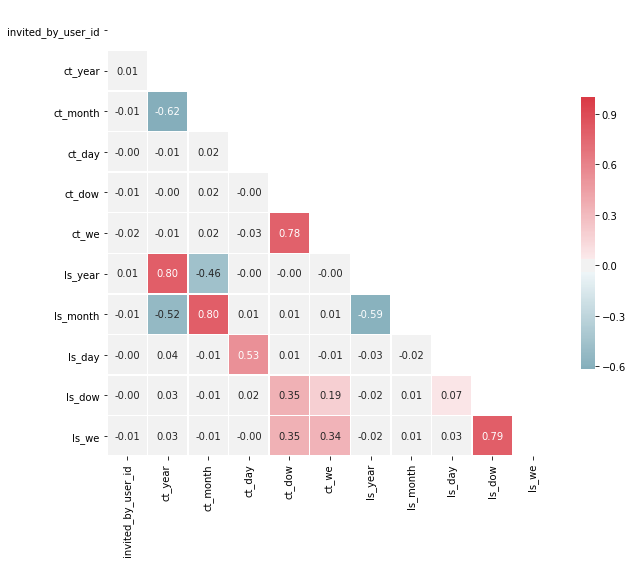

In [45]:
# Compute the correlation matrix
corr = tu_comb.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10,10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
_ = sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f')


## 4.2) Creation Source vs. Adopted User

In [46]:
# data neccesary for this section
cs_au = tu_comb.copy()[['creation_source','adopted_user']]

In [47]:
# count num of users per category
cs_au['creation_source'].value_counts()

ORG_INVITE            3188
SIGNUP                1898
GUEST_INVITE          1588
SIGNUP_GOOGLE_AUTH    1385
PERSONAL_PROJECTS      764
Name: creation_source, dtype: int64

In [48]:
# count num of users per category
cs_au['adopted_user'].value_counts()

0    7167
1    1656
Name: adopted_user, dtype: int64

In [49]:
# create pivot table to compare categories
cs_au_totals = pd.pivot_table(cs_au, index=['creation_source'], columns=['adopted_user'], aggfunc=len)
cs_au_totals

adopted_user,0,1
creation_source,,
GUEST_INVITE,1219,369
ORG_INVITE,2614,574
SIGNUP,1596,302
PERSONAL_PROJECTS,592,172
SIGNUP_GOOGLE_AUTH,1146,239


In [50]:
# convert table into percentages
cols = cs_au_totals.columns
cs_au_perc = cs_au_totals[cols].div(cs_au_totals[cols].sum(axis=1), axis=0).multiply(100).round(1)
cs_au_perc

adopted_user,0,1
creation_source,,
GUEST_INVITE,76.8,23.2
ORG_INVITE,82.0,18.0
SIGNUP,84.1,15.9
PERSONAL_PROJECTS,77.5,22.5
SIGNUP_GOOGLE_AUTH,82.7,17.3


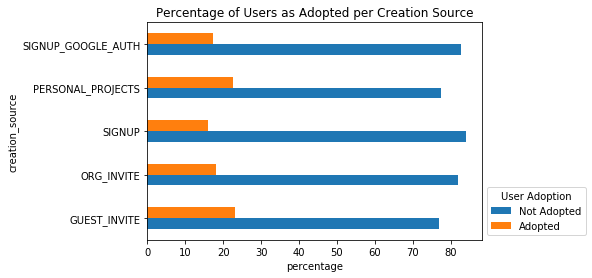

In [51]:
# compare creation_source to adopted_user

_ = cs_au_perc.plot(kind='barh')
_ = plt.xlabel('percentage')
_ = plt.title('Percentage of Users as Adopted per Creation Source')
_ = plt.legend(['Not Adopted', 'Adopted'], 
               title='User Adoption', 
               loc='lower left', 
               bbox_to_anchor=(1,0))


Distinction between adopted and not adopted isn't highly correlated with the Creation Source.

## 4.3) Email Host vs. Adopted User

In [52]:
# data neccesary for this section
eh_au = tu_comb.copy()[['email_host','adopted_user']]

In [53]:
# count num of users per category
eh_au['email_host'].value_counts()

gmail.com         2930
yahoo.com         1726
jourrapide.com     883
gustr.com          842
cuvox.de           828
other              811
hotmail.com        803
Name: email_host, dtype: int64

In [54]:
# count num of users per category
eh_au['adopted_user'].value_counts()

0    7167
1    1656
Name: adopted_user, dtype: int64

In [55]:
# create pivot table to compare categories

eh_au_totals = pd.pivot_table(eh_au, index=['email_host'], columns=['adopted_user'], aggfunc=len)
eh_au_totals

adopted_user,0,1
email_host,,
yahoo.com,1459,267
gustr.com,692,150
jourrapide.com,713,170
cuvox.de,684,144
gmail.com,2373,557
other,648,163
hotmail.com,598,205


In [56]:
# convert table into percentages

cols = eh_au_totals.columns
eh_au_perc = eh_au_totals[cols].div(eh_au_totals[cols].sum(axis=1), axis=0).multiply(100).round(1)
eh_au_perc

adopted_user,0,1
email_host,,
yahoo.com,84.5,15.5
gustr.com,82.2,17.8
jourrapide.com,80.7,19.3
cuvox.de,82.6,17.4
gmail.com,81.0,19.0
other,79.9,20.1
hotmail.com,74.5,25.5


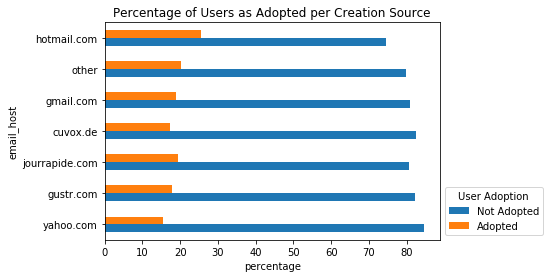

In [57]:
# compare creation_source to adopted_user

_ = eh_au_perc.plot(kind='barh')
_ = plt.xlabel('percentage')
_ = plt.title('Percentage of Users as Adopted per Creation Source')
_ = plt.legend(['Not Adopted', 'Adopted'], 
               title='User Adoption', 
               loc='lower left', 
               bbox_to_anchor=(1,0))

Distinction between adopted and not adopted isn't highly correlated with the email host.

In [58]:
tu_comb.head()

,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,ct_year,...,ct_dow,ct_we,email_host,ls_year,ls_month,ls_day,ls_dow,ls_we,invited,adopted_user
user_id,,,,,,,,,,,,,,,,,,,,,
1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803,2014,...,1,0,yahoo.com,2014,4,22,1,0,1,0
2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316,2013,...,4,0,gustr.com,2014,3,31,0,0,1,1
3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525,2013,...,1,0,gustr.com,2013,3,19,1,0,1,0
4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151,2013,...,1,0,yahoo.com,2013,5,22,2,0,1,0
5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240,2013,...,3,0,yahoo.com,2013,1,22,1,0,1,0


# 5) Prediction

## 5.1) Data Preperation

In [59]:
df = tu_comb.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8823 entries, 1 to 12000
Data columns (total 22 columns):
creation_time                 8823 non-null datetime64[ns]
name                          8823 non-null object
email                         8823 non-null object
creation_source               8823 non-null category
last_session_creation_time    8823 non-null datetime64[ns]
opted_in_to_mailing_list      8823 non-null category
enabled_for_marketing_drip    8823 non-null category
org_id                        8823 non-null category
invited_by_user_id            8823 non-null int32
ct_year                       8823 non-null int64
ct_month                      8823 non-null int64
ct_day                        8823 non-null int64
ct_dow                        8823 non-null int64
ct_we                         8823 non-null int32
email_host                    8823 non-null category
ls_year                       8823 non-null int64
ls_month                      8823 non-null int64
ls_day 

In [60]:
# remove non-correlative data (unique values)

# drop object and datetime columns
df.drop(df.select_dtypes(['object']), inplace=True, axis=1)
df.drop(df.select_dtypes(['datetime']), inplace=True, axis=1)
df.drop(['org_id','invited_by_user_id'], inplace=True, axis = 1)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8823 entries, 1 to 12000
Data columns (total 16 columns):
creation_source               8823 non-null category
opted_in_to_mailing_list      8823 non-null category
enabled_for_marketing_drip    8823 non-null category
ct_year                       8823 non-null int64
ct_month                      8823 non-null int64
ct_day                        8823 non-null int64
ct_dow                        8823 non-null int64
ct_we                         8823 non-null int32
email_host                    8823 non-null category
ls_year                       8823 non-null int64
ls_month                      8823 non-null int64
ls_day                        8823 non-null int64
ls_dow                        8823 non-null int64
ls_we                         8823 non-null int32
invited                       8823 non-null category
adopted_user                  8823 non-null category
dtypes: category(6), int32(2), int64(8)
memory usage: 741.9 KB


In [62]:
df.head()

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,ct_year,ct_month,ct_day,ct_dow,ct_we,email_host,ls_year,ls_month,ls_day,ls_dow,ls_we,invited,adopted_user
user_id,,,,,,,,,,,,,,,,
1,GUEST_INVITE,1,0,2014,4,22,1,0,yahoo.com,2014,4,22,1,0,1,0
2,ORG_INVITE,0,0,2013,11,15,4,0,gustr.com,2014,3,31,0,0,1,1
3,ORG_INVITE,0,0,2013,3,19,1,0,gustr.com,2013,3,19,1,0,1,0
4,GUEST_INVITE,0,0,2013,5,21,1,0,yahoo.com,2013,5,22,2,0,1,0
5,GUEST_INVITE,0,0,2013,1,17,3,0,yahoo.com,2013,1,22,1,0,1,0


In [63]:
# convert categorical columns with 2 categories into int64

conv_cols = list(df.columns)
conv_cols.remove('creation_source') # >2 categories
conv_cols.remove('email_host') # >2 categories

for col in conv_cols:
    df[col] = df[col].astype(np.int64)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8823 entries, 1 to 12000
Data columns (total 16 columns):
creation_source               8823 non-null category
opted_in_to_mailing_list      8823 non-null int64
enabled_for_marketing_drip    8823 non-null int64
ct_year                       8823 non-null int64
ct_month                      8823 non-null int64
ct_day                        8823 non-null int64
ct_dow                        8823 non-null int64
ct_we                         8823 non-null int64
email_host                    8823 non-null category
ls_year                       8823 non-null int64
ls_month                      8823 non-null int64
ls_day                        8823 non-null int64
ls_dow                        8823 non-null int64
ls_we                         8823 non-null int64
invited                       8823 non-null int64
adopted_user                  8823 non-null int64
dtypes: category(2), int64(14)
memory usage: 1.0 MB


In [65]:
# ONE-HOT ENCODING: create a new column for each unique category in a categorical variable
# Each observation receives a 1 in the column for its corresponding category and a 0 in all other new columns
# Use for columns with 3+ categories.

df = pd.get_dummies(df)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8823 entries, 1 to 12000
Data columns (total 26 columns):
opted_in_to_mailing_list              8823 non-null int64
enabled_for_marketing_drip            8823 non-null int64
ct_year                               8823 non-null int64
ct_month                              8823 non-null int64
ct_day                                8823 non-null int64
ct_dow                                8823 non-null int64
ct_we                                 8823 non-null int64
ls_year                               8823 non-null int64
ls_month                              8823 non-null int64
ls_day                                8823 non-null int64
ls_dow                                8823 non-null int64
ls_we                                 8823 non-null int64
invited                               8823 non-null int64
adopted_user                          8823 non-null int64
creation_source_GUEST_INVITE          8823 non-null uint8
creation_source_ORG_IN

In [67]:
df.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,ct_year,ct_month,ct_day,ct_dow,ct_we,ls_year,ls_month,ls_day,...,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH,email_host_cuvox.de,email_host_gmail.com,email_host_gustr.com,email_host_hotmail.com,email_host_jourrapide.com,email_host_yahoo.com,email_host_other
user_id,,,,,,,,,,,,,,,,,,,,,
1,1,0,2014,4,22,1,0,2014,4,22,...,0,0,0,0,0,0,0,0,1,0
2,0,0,2013,11,15,4,0,2014,3,31,...,0,0,0,0,0,1,0,0,0,0
3,0,0,2013,3,19,1,0,2013,3,19,...,0,0,0,0,0,1,0,0,0,0
4,0,0,2013,5,21,1,0,2013,5,22,...,0,0,0,0,0,0,0,0,1,0
5,0,0,2013,1,17,3,0,2013,1,22,...,0,0,0,0,0,0,0,0,1,0


In [68]:
df.describe()

,opted_in_to_mailing_list,enabled_for_marketing_drip,ct_year,ct_month,ct_day,ct_dow,ct_we,ls_year,ls_month,ls_day,...,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH,email_host_cuvox.de,email_host_gmail.com,email_host_gustr.com,email_host_hotmail.com,email_host_jourrapide.com,email_host_yahoo.com,email_host_other
count,8823.000000,8823.000000,8823.000000,8823.000000,8823.000000,8823.000000,8823.000000,8823.000000,8823.000000,8823.000000,...,8823.000000,8823.000000,8823.000000,8823.000000,8823.000000,8823.000000,8823.000000,8823.000000,8823.000000,8823.000000
mean,0.252295,0.151989,2013.067437,6.239828,16.003514,2.992066,0.276210,2013.243568,6.086705,15.690128,...,0.086592,0.215120,0.156976,0.093846,0.332087,0.095432,0.091012,0.100079,0.195625,0.091919
std,0.434354,0.359031,0.723263,3.433775,8.834718,1.982908,0.447147,0.736980,3.142008,9.339747,...,0.281252,0.410929,0.363799,0.291630,0.470989,0.293828,0.287643,0.300123,0.396704,0.288928
min,0.000000,0.000000,2012.000000,1.000000,1.000000,0.000000,0.000000,2012.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,2013.000000,3.000000,8.000000,1.000000,0.000000,2013.000000,4.000000,7.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,2013.000000,6.000000,16.000000,3.000000,0.000000,2013.000000,6.000000,16.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,2014.000000,9.000000,24.000000,5.000000,1.000000,2014.000000,9.000000,24.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,2014.000000,12.000000,31.000000,6.000000,1.000000,2014.000000,12.000000,31.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 5.2) Split Data Into XY

In [69]:
# create X

# remove the column for Y
X = df.drop(['adopted_user'], axis=1)

X.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,ct_year,ct_month,ct_day,ct_dow,ct_we,ls_year,ls_month,ls_day,...,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH,email_host_cuvox.de,email_host_gmail.com,email_host_gustr.com,email_host_hotmail.com,email_host_jourrapide.com,email_host_yahoo.com,email_host_other
user_id,,,,,,,,,,,,,,,,,,,,,
1,1,0,2014,4,22,1,0,2014,4,22,...,0,0,0,0,0,0,0,0,1,0
2,0,0,2013,11,15,4,0,2014,3,31,...,0,0,0,0,0,1,0,0,0,0
3,0,0,2013,3,19,1,0,2013,3,19,...,0,0,0,0,0,1,0,0,0,0
4,0,0,2013,5,21,1,0,2013,5,22,...,0,0,0,0,0,0,0,0,1,0
5,0,0,2013,1,17,3,0,2013,1,22,...,0,0,0,0,0,0,0,0,1,0


In [70]:
# create y

y = df['adopted_user']
y.head()

user_id
1    0
2    1
3    0
4    0
5    0
Name: adopted_user, dtype: int64

## 5.3) Split Data into Train/Test

In [71]:
# split df into train / test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [72]:
X_train.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,ct_year,ct_month,ct_day,ct_dow,ct_we,ls_year,ls_month,ls_day,...,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH,email_host_cuvox.de,email_host_gmail.com,email_host_gustr.com,email_host_hotmail.com,email_host_jourrapide.com,email_host_yahoo.com,email_host_other
user_id,,,,,,,,,,,,,,,,,,,,,
6860,1,0,2014,5,30,4,0,2014,5,30,...,0,1,0,0,0,0,0,0,1,0
5386,0,0,2012,7,2,0,0,2014,6,1,...,0,0,0,0,0,0,0,1,0,0
2750,0,0,2014,3,18,1,0,2014,6,4,...,0,0,0,0,0,0,0,0,1,0
6647,1,1,2012,7,27,4,0,2012,7,27,...,0,0,1,0,1,0,0,0,0,0
6630,0,0,2013,4,7,6,1,2013,4,7,...,0,1,0,0,0,0,0,0,0,1


In [73]:
X_test.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,ct_year,ct_month,ct_day,ct_dow,ct_we,ls_year,ls_month,ls_day,...,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH,email_host_cuvox.de,email_host_gmail.com,email_host_gustr.com,email_host_hotmail.com,email_host_jourrapide.com,email_host_yahoo.com,email_host_other
user_id,,,,,,,,,,,,,,,,,,,,,
2388,0,0,2013,9,2,0,0,2013,9,2,...,0,0,0,0,0,0,1,0,0,0
10146,0,0,2014,4,17,3,0,2014,5,6,...,0,1,0,1,0,0,0,0,0,0
7301,1,0,2014,3,17,0,0,2014,5,27,...,0,0,1,0,1,0,0,0,0,0
6108,0,1,2013,12,16,0,0,2014,5,30,...,1,0,0,0,0,1,0,0,0,0
295,0,0,2012,10,10,2,0,2012,10,17,...,0,0,1,0,1,0,0,0,0,0


In [74]:
y_train.head()

user_id
6860    0
5386    1
2750    1
6647    0
6630    0
Name: adopted_user, dtype: int64

In [75]:
y_test.head()

user_id
2388     0
10146    0
7301     1
6108     1
295      0
Name: adopted_user, dtype: int64

## 5.4) Information Values Analysis (IV)

Information Value Analysis (IV) is a data exploration technique that helps determine which data columns in a dataset have predictive power or influence on the value of a specified dependent variable.

In [76]:
#import libraries for VIF

from scipy import stats
import pandas.core.algorithms as algos
import re
import traceback

In [77]:
max_bin = 20
force_bin = 3

In [78]:
# define a binning function
def mono_bin(Y, X, n = max_bin):
    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

In [79]:
def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)

In [80]:
def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    
    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(pd.Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv)


In [81]:
final_iv, IV = data_vars(X_train, y_train)

In [82]:
final_iv.head()

,VAR_NAME,MIN_VALUE,MAX_VALUE,COUNT,EVENT,EVENT_RATE,NONEVENT,NON_EVENT_RATE,DIST_EVENT,DIST_NON_EVENT,WOE,IV
0,opted_in_to_mailing_list,0,0,4601,861,0.187133,3740,0.812867,0.734015,0.747551,-0.018273,0.000954
1,opted_in_to_mailing_list,1,1,1575,312,0.198095,1263,0.801905,0.265985,0.252449,0.052231,0.000954
2,enabled_for_marketing_drip,0,0,5232,980,0.187309,4252,0.812691,0.835465,0.849890,-0.017119,0.001571
3,enabled_for_marketing_drip,1,1,944,193,0.204449,751,0.795551,0.164535,0.150110,0.091758,0.001571
4,ct_year,2012,2013,4346,958,0.220433,3388,0.779567,0.816709,0.677194,0.187326,0.105098


In [83]:
IV

,VAR_NAME,IV
0,creation_source_GUEST_INVITE,0.019929
1,creation_source_ORG_INVITE,0.001035
2,creation_source_PERSONAL_PROJECTS,0.001520
3,creation_source_SIGNUP,0.009051
4,creation_source_SIGNUP_GOOGLE_AUTH,0.001394
5,ct_day,0.008119
6,ct_dow,0.002807
7,ct_month,0.013697
8,ct_we,0.000813
9,ct_year,0.105098


In [84]:
features = list(IV[(IV['IV'] >= 0.01) & (IV['IV'] <= 0.8)]['VAR_NAME'])
X2 = X_train[features]
X2.head()

,creation_source_GUEST_INVITE,ct_month,ct_year,email_host_hotmail.com,email_host_yahoo.com,ls_day,ls_dow,ls_month,ls_we
user_id,,,,,,,,,
6860,0,5,2014,0,1,30,4,5,0
5386,0,7,2012,0,0,1,6,6,1
2750,0,3,2014,0,1,4,2,6,0
6647,0,7,2012,0,0,27,4,7,0
6630,0,4,2013,0,0,7,6,4,1


## 5.5) Variance Inflation Factor

Variance Inflation Factor (VIF) is the ratio of variance in a model with multiple terms, divided by the variance of a model with one term alone. It quantifies the severity of multicollinearity in an ordinary least squares regression analysis.

In [85]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [86]:
def iterate_vif(df, vif_threshold=5, max_vif=6):
  count = 0
  while max_vif > vif_threshold:
    count += 1
    print("Iteration # "+str(count))
    vif = pd.DataFrame()
    vif["VIFactor"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif["features"] = df.columns
    
    if vif['VIFactor'].max().round(1) > vif_threshold:
      print('Removing %s with VIF of %f' % (vif[vif['VIFactor'] == vif['VIFactor'].max()]['features'].values[0], 
                                            vif['VIFactor'].max().round(1)))
      df = df.drop(vif[vif['VIFactor'] == vif['VIFactor'].max()]['features'].values[0], axis=1)
      max_vif = vif['VIFactor'].max().round(1)
    else:
        print('Complete')
        return df, vif.sort_values('VIFactor').round(1)

In [87]:
X3 = X2._get_numeric_data()
final_df, final_vif = iterate_vif(X3)

Iteration # 1
Removing ls_month with VIF of 13.500000
Iteration # 2
Removing ct_year with VIF of 10.500000
Iteration # 3
Removing ls_dow with VIF of 6.700000
Iteration # 4
Complete


In [88]:
final_df.head()

,creation_source_GUEST_INVITE,ct_month,email_host_hotmail.com,email_host_yahoo.com,ls_day,ls_we
user_id,,,,,,
6860,0,5,0,1,30,0
5386,0,7,0,0,1,1
2750,0,3,0,1,4,0
6647,0,7,0,0,27,0
6630,0,4,0,0,7,1


In [89]:
final_cols = list(final_df.columns)
final_cols

['creation_source_GUEST_INVITE',
 'ct_month',
 'email_host_hotmail.com',
 'email_host_yahoo.com',
 'ls_day',
 'ls_we']

## 5.6) Final Training and Test Sets

In [90]:
X_train = X_train[final_cols]
X_train.head()

,creation_source_GUEST_INVITE,ct_month,email_host_hotmail.com,email_host_yahoo.com,ls_day,ls_we
user_id,,,,,,
6860,0,5,0,1,30,0
5386,0,7,0,0,1,1
2750,0,3,0,1,4,0
6647,0,7,0,0,27,0
6630,0,4,0,0,7,1


In [91]:
X_test = X_test[final_df.columns.tolist()]
X_test.head()

,creation_source_GUEST_INVITE,ct_month,email_host_hotmail.com,email_host_yahoo.com,ls_day,ls_we
user_id,,,,,,
2388,0,9,1,0,2,0
10146,0,4,0,0,6,0
7301,0,3,0,0,27,0
6108,0,12,0,0,30,0
295,0,10,0,0,17,0


In [92]:
y_train.head()

user_id
6860    0
5386    1
2750    1
6647    0
6630    0
Name: adopted_user, dtype: int64

In [93]:
y_test.head()

user_id
2388     0
10146    0
7301     1
6108     1
295      0
Name: adopted_user, dtype: int64

# 6) Pipeline

## 6.1) Data Preparation

### 6.1.1) Load Data

In [94]:
# check encoding for csv file
with open('takehome_users.csv', 'rb') as f:
    result = chardet.detect(f.read())
    
# read file
tu_raw = pd.read_csv('takehome_users.csv', 
                 index_col=0, 
                 encoding=result['encoding'])

# copy the df to edit
tu = tu_raw.copy()

tu.head()

,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
object_id,,,,,,,,,
1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [95]:
# check encoding for csv file
with open('takehome_user_engagement.csv', 'rb') as f:
    result = chardet.detect(f.read())
    
# read file
tue_raw = pd.read_csv('takehome_user_engagement.csv', 
                 index_col=0, # set time_stamp col to index later
                 encoding=result['encoding'])

# copy the df to edit
tue = tue_raw.copy()

tue.head()

,user_id,visited
time_stamp,,
2014-04-22 03:53:30,1,1
2013-11-15 03:45:04,2,1
2013-11-29 03:45:04,2,1
2013-12-09 03:45:04,2,1
2013-12-25 03:45:04,2,1


### 6.1.2) Clean Data

#### Column Type

In [96]:
# takehome_users (tu) df

# rename index name
tu.index.names = ['user_id']


# convert date columns to datetime
tu['creation_time'] = pd.to_datetime(tu['creation_time'])
# convert unix timestamp to datetime
tu['last_session_creation_time'] = pd.to_datetime(tu['last_session_creation_time'],unit='s')


# convert columns to category format
cat_cols = ['creation_source',
            'opted_in_to_mailing_list',
            'enabled_for_marketing_drip',
            'org_id']
for col in cat_cols:
    tu[col] = pd.Categorical(tu[col])

In [97]:
# takehome_user_engagement (tue) df

# convert time_stamp to datetime
tue.index = pd.to_datetime(tue.index)


# convert columns to category format
tue['visited'] = pd.Categorical(tue['visited'])

#### Missing Values

In [98]:
# takehome_users (tu) df - missing values

# drop rows with NaT values
tu = tu.dropna(subset=['last_session_creation_time'])


# set NaN value to 0
tu['invited_by_user_id'].fillna(0, inplace=True)

# convert float to int
tu['invited_by_user_id'] = tu['invited_by_user_id'].astype(int) 

In [99]:
# takehome_user_engagement (tue) df - missing values

tue_miss = tue.columns[tue.isna().any()].tolist()

if(len(tue_miss) == 0):
    print ('There are no missing values')
else:
    print(tue_miss)

There are no missing values


#### Feature Engineering

In [100]:
# takehome_user_engagement (tue) df - creation time

tu['ct_year'] = pd.DatetimeIndex(tu['creation_time']).year
tu['ct_month'] = pd.DatetimeIndex(tu['creation_time']).month
tu['ct_day'] = pd.DatetimeIndex(tu['creation_time']).day
tu['ct_dow'] = tu['creation_time'].dt.dayofweek # Monday = 0 & Sunday = 6
tu['ct_we'] = np.where(tu['ct_dow']==5 , 1, 
                       np.where(tu['ct_dow']==6 , 1, 
                                np.where(tu['ct_dow'].isnull(), np.NaN, 0))) # weekend = 1, weekday = 0, NaN = NaN

tu['ct_we'] = tu['ct_we'].astype(int) # convert column from float to int

In [101]:
# takehome_user_engagement (tue) df - email host

# extract host string from email column
tu['email_host'] = tu['email'].str.split('@').str.get(1)

# convert column to category format
tu['email_host'] = pd.Categorical(tu['email_host'])

# create list of categories
email_host_rank = tu['email_host'].value_counts().index.tolist()

# create list of top 6
email_host_top_six = email_host_rank[:6]

# create list to replace with 'other'
email_host_replace = email_host_rank[6:]

# add new category
tu['email_host'] = tu['email_host'].cat.add_categories(['other'])

# replace the rest of the categories with 'other'
tu['email_host'] = tu['email_host'].replace(email_host_replace, 'other')

# remove unused categories
tu['email_host'] = tu['email_host'].cat.remove_unused_categories()

In [102]:
# takehome_user_engagement (tue) df - last session creation time

tu['ls_year'] = pd.DatetimeIndex(tu['last_session_creation_time']).year
tu['ls_month'] = pd.DatetimeIndex(tu['last_session_creation_time']).month
tu['ls_day'] = pd.DatetimeIndex(tu['last_session_creation_time']).day
tu['ls_dow'] = tu['last_session_creation_time'].dt.dayofweek # Monday = 0 & Sunday = 6
tu['ls_we'] = np.where(tu['ls_dow']==5 , 1, 
                       np.where(tu['ls_dow']==6 , 1, 
                                np.where(tu['ls_dow'].isnull(), np.NaN, 0))) # weekend = 1, weekday = 0, NaN = NaN

tu['ls_we'] = tu['ls_we'].astype(int) # convert column from float to int

In [103]:
# takehome_user_engagement (tue) df - invited by user id

# 1 = invited, 0 = not invited
tu['invited'] = np.where(tu['invited_by_user_id']==0, 0, 1)

# convert column to category format
tu['invited'] = pd.Categorical(tu['invited'])

In [104]:
tu.head()

,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,ct_year,...,ct_day,ct_dow,ct_we,email_host,ls_year,ls_month,ls_day,ls_dow,ls_we,invited
user_id,,,,,,,,,,,,,,,,,,,,,
1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803,2014,...,22,1,0,yahoo.com,2014,4,22,1,0,1
2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316,2013,...,15,4,0,gustr.com,2014,3,31,0,0,1
3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525,2013,...,19,1,0,gustr.com,2013,3,19,1,0,1
4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151,2013,...,21,1,0,yahoo.com,2013,5,22,2,0,1
5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240,2013,...,17,3,0,yahoo.com,2013,1,22,1,0,1


In [105]:
# takehome_user_engagement (tue) df - login date

# convert index into column
tue.reset_index(level=0, inplace=True)

# keep only 2 columns, reorder and sort columns
tue = tue[['user_id', 'time_stamp']].sort_values(by=['user_id', 'time_stamp'])

# strip the time from the column
tue['time_stamp'] = tue['time_stamp'].dt.date

# rename column
tue = tue.rename(columns={"time_stamp": "login_date"})

# drop duplicate logins (multiple logins on the same day)
tue = tue.drop_duplicates()

In [106]:
tue.head()

,user_id,login_date
0,1,2014-04-22
1,2,2013-11-15
2,2,2013-11-29
3,2,2013-12-09
4,2,2013-12-25


#### Adopted User

In [107]:
# takehome_user_engagement (tue) df - adopted user

# create a custom function to aggregate the users

def adopt_func(a):
    '''
    1) check how many times the user logged in
    2) if # of logins >= 3, then calculate if any set of the 3 consecutive logins 
        happened on different days in a 7 day window    
    '''
    
    min_logins = 3
    max_day_range = 7

    #print('new user')
    
    # check if num of logins > min_logings
    if len(a) >= min_logins: 
        #print('logins >= 3')
        b = [i for i in a]  # convert property object to list
        b.sort() # sort the dates
        c = [b[i+1] - b[i] for i in range(len(b)-1)] # count the number of days between each pair of logins
        d = [c[i] + c[i+1] for i in range(len(c)-1)] # count the total number of days between 3 consecutive logins
        
        # check if the min delta for 3 consecutive logins is <= max_day_range
        if (min(d) <= timedelta(days=max_day_range)):
            #print('within 7 days')
            return 1
        else:
            #print('not within 7 days')
            return 0
    else:
        #print('logins < 3')
        return 0






In [108]:
# use groupby to categorize users into adopted users or not

# group by user_id and aggregate using custom function
tue_agg = tue.groupby('user_id').agg(adopt_func)

# rename columns
tue_agg.columns = ['adopted_user']

# convert column to category format
tue_agg['adopted_user'] = pd.Categorical(tue_agg['adopted_user'])

In [109]:
tue_agg.head()

,adopted_user
user_id,
1,0
2,1
3,0
4,0
5,0


#### Combine DFs

In [110]:
# combine tu and tue_agg tables by user_id
tu_comb = tu.merge(tue_agg, on='user_id')
tu_comb.head()

,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,ct_year,...,ct_dow,ct_we,email_host,ls_year,ls_month,ls_day,ls_dow,ls_we,invited,adopted_user
user_id,,,,,,,,,,,,,,,,,,,,,
1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803,2014,...,1,0,yahoo.com,2014,4,22,1,0,1,0
2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316,2013,...,4,0,gustr.com,2014,3,31,0,0,1,1
3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525,2013,...,1,0,gustr.com,2013,3,19,1,0,1,0
4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151,2013,...,1,0,yahoo.com,2013,5,22,2,0,1,0
5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240,2013,...,3,0,yahoo.com,2013,1,22,1,0,1,0


In [111]:
# remove columns: objects, datetime and unique values

rem_cols = list(tu_comb.select_dtypes(['object'])) + \
                            list(tu_comb.select_dtypes(['datetime'])) + \
                            ['org_id','invited_by_user_id']
print(rem_cols)

tu_comb.drop(rem_cols, inplace=True, axis = 1)


['name', 'email', 'creation_time', 'last_session_creation_time', 'org_id', 'invited_by_user_id']


In [112]:
# convert categorical cols into int

# for cols with 2 categories
conv_cols = list(tu_comb.columns)
conv_cols.remove('creation_source') # >2 categories
conv_cols.remove('email_host') # >2 categories

for col in conv_cols:
    tu_comb[col] = tu_comb[col].astype(np.int64)
 

# for cols with > 2 categories
tu_comb = pd.get_dummies(tu_comb)    
    

In [113]:
tu_comb.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,ct_year,ct_month,ct_day,ct_dow,ct_we,ls_year,ls_month,ls_day,...,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH,email_host_cuvox.de,email_host_gmail.com,email_host_gustr.com,email_host_hotmail.com,email_host_jourrapide.com,email_host_yahoo.com,email_host_other
user_id,,,,,,,,,,,,,,,,,,,,,
1,1,0,2014,4,22,1,0,2014,4,22,...,0,0,0,0,0,0,0,0,1,0
2,0,0,2013,11,15,4,0,2014,3,31,...,0,0,0,0,0,1,0,0,0,0
3,0,0,2013,3,19,1,0,2013,3,19,...,0,0,0,0,0,1,0,0,0,0
4,0,0,2013,5,21,1,0,2013,5,22,...,0,0,0,0,0,0,0,0,1,0
5,0,0,2013,1,17,3,0,2013,1,22,...,0,0,0,0,0,0,0,0,1,0


In [114]:
final_df = tu_comb[final_cols]
final_df.head()

,creation_source_GUEST_INVITE,ct_month,email_host_hotmail.com,email_host_yahoo.com,ls_day,ls_we
user_id,,,,,,
1,1,4,0,1,22,0
2,0,11,0,0,31,0
3,0,3,0,0,19,0
4,1,5,0,1,22,0
5,1,1,0,1,22,0


## 6.2) Preprocess the Data

In [115]:
# import libraries

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score, precision_recall_curve
import time

In [116]:
# create a pipeline to preprocess the data

# numerical features and transformer
num_feat = final_df.select_dtypes(include='number').columns.tolist()
print('numerical columns:', num_feat)
num_tran = Pipeline(steps=[
                            ('imputer', SimpleImputer(strategy='median')),
                            ('scaler', StandardScaler())
                                ])

# categorical features and transformer
cat_feat = final_df.select_dtypes(include='category').columns.tolist()
print('categorical columns:', cat_feat)
cat_tran = Pipeline(steps=[
                            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
                            ('onehot', OneHotEncoder())
                                ])

# combine cat and num transformers
preprocessor = ColumnTransformer(transformers=[
                                    ('num', num_tran, num_feat),
                                    ('cat', cat_tran, cat_feat)
                                        ])

numerical columns: ['creation_source_GUEST_INVITE', 'ct_month', 'email_host_hotmail.com', 'email_host_yahoo.com', 'ls_day', 'ls_we']
categorical columns: []


## 6.3) Split Data

In [117]:

# input data
X = df.drop(['adopted_user'], axis=1)

# output data
y = df['adopted_user']

# create random seed
np.random.seed(0)

# split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=0, 
                                                    stratify=y)

In [118]:
# only use columns/features from IV/VIF results
X_train = X_train[final_cols]
X_train.head()

,creation_source_GUEST_INVITE,ct_month,email_host_hotmail.com,email_host_yahoo.com,ls_day,ls_we
user_id,,,,,,
11581,0,11,0,0,30,0
7426,0,5,0,0,5,1
3212,0,7,0,0,28,1
9527,0,9,0,1,23,0
3265,0,9,0,1,3,0


In [119]:
# only use columns/features from IV/VIF results
X_test = X_test[final_cols]
X_test.head()

,creation_source_GUEST_INVITE,ct_month,email_host_hotmail.com,email_host_yahoo.com,ls_day,ls_we
user_id,,,,,,
3328,0,3,0,0,26,0
1663,1,7,0,0,4,0
208,0,7,0,0,31,0
45,0,4,0,0,30,0
36,1,8,0,0,6,0


## 6.4) Create Metrics Table

In [120]:
# create a table to collect the metrics used to score each model

# metrics used
met = ['accuracy', 'precision', 'recall', 'auc', 'time to train']

# models used
mod = ['Dummy Model', 'Logistic Regression', 'K Nearest Neighbors', 
       'Support Vector Machine', 'Decision Tree', 'Random Forest', 'Naive Bayes', 'XGBoost']

# create df to collect metrics per model
metrics = pd.DataFrame(index=met, columns=mod)
metrics

,Dummy Model,Logistic Regression,K Nearest Neighbors,Support Vector Machine,Decision Tree,Random Forest,Naive Bayes,XGBoost
accuracy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
precision,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
recall,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
auc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time to train,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 6.5) Instantiate the Model

In [121]:
# import classifiers

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from scipy.stats import randint
from xgboost.sklearn import XGBClassifier

In [122]:
classifier_dm = DummyClassifier(strategy='most_frequent', random_state=0)
classifier_lr = LogisticRegression(solver='liblinear', random_state=0)
classifier_knn = KNeighborsClassifier()
classifier_svm = SVC(random_state=0)
classifier_dt = DecisionTreeClassifier(random_state=0)
classifier_rf = RandomForestClassifier(random_state=0)
classifier_nb = GaussianNB()
classifier_xgb = XGBClassifier(objective='binary:logistic')

classifiers = [classifier_dm, classifier_lr, classifier_knn, 
               classifier_svm, classifier_dt, classifier_rf, 
               classifier_nb, classifier_xgb]

## 6.6) Specify the Hyperparameter Space

In [123]:
# dummy parameters
param_grid_dm = None

# logistic regression parameters
param_grid_lr = {
                    'preprocessor__num__imputer__strategy': ['mean', 'median'],
                    'classifier__C': np.logspace(-5, 8, 15),
                    'classifier__penalty': ['l1', 'l2']
                }

# knn parameters
param_grid_knn = {
                    'preprocessor__num__imputer__strategy': ['mean', 'median'],
                    'classifier__n_neighbors': np.arange(1,20)
                 }

# svm parameters
param_grid_svm = {
                    'preprocessor__num__imputer__strategy': ['mean', 'median'],
                    'classifier__C': [0.1, 1, 10, 100],
                    'classifier__gamma': [1, 0.1, 0.01]
                 }

# decision tree parameters
param_grid_dt = {
                    'preprocessor__num__imputer__strategy': ['mean', 'median'],
                    'classifier__max_depth': [3, 10, 20, None],
                    'classifier__max_features': randint(1, 3),
                    # TRY__2 'classifier__max_features': randint(1, 9),
                    'classifier__min_samples_leaf': randint(1, 9),
                    'classifier__min_samples_split': randint(2, 9),
                    'classifier__criterion': ["gini", "entropy"]
                 }

# random forest parameters
param_grid_rf = {
                    'preprocessor__num__imputer__strategy': ['mean', 'median'], 
                    'classifier__n_estimators': [50, 100],
                    'classifier__criterion': ["gini", "entropy"],
                    'classifier__max_depth': [3, 10, 20, None],
                    'classifier__min_samples_leaf': randint(1, 9),
                    'classifier__min_samples_split': randint(2, 9),
                    'classifier__max_features': randint(1,5)
                 }

# GaussianNB parameters
param_grid_nb = None

# XGBoost parameters
# xgboost parameters are similar, but not the same as random forest parameters
# https://xgboost.readthedocs.io/en/latest/python/python_intro.html
# https://pandas-ml.readthedocs.io/en/latest/xgboost.html
param_grid_xgb = {
                    'classifier__max_depth': [3, 5, 9, 11, 13], # more trees = overfit
                    'classifier__learning_rate': [0.01, 0.03, 0.05, 0.07, 0.10], # 0.01 - 0.1, lower learning rate = more accurate
                    'classifier__n_estimators': [10, 15, 20, 25, 30, 35, 40] # number of trees
                 }

# list of parameters for each model type
param_grids = [param_grid_dm, param_grid_lr, param_grid_knn, 
               param_grid_svm, param_grid_dt, param_grid_rf, 
               param_grid_nb, param_grid_xgb]

## 6.7) Train and Score Function

### 6.7.1) Instantiate CV Objects

In [124]:
# list of models names
model_names = ['Dummy Model', 'Logistic Regression', 'K Nearest Neighbors', 
               'Support Vector Machine', 'Decision Tree', 'Random Forest', 
               'Naive Bayes', 'XGBoost']
# list of cvs names
cv_names = ['dm_cv', 'lr_cv', 'knn_cv', 
            'svm_cv', 'dt_cv', 'rf_cv', 
            'nb_cv', 'xgb_cv']

# list of cv values
cvs = [None, 5, 5, 5, 5, 5, 5, 5]

### 6.7.2) Train, Predict, Score Model Function

In [125]:
def train_and_score_model(model_name, estimator, param_grid=None, cv=5, iid=False):
    
    #### Step 5: Instantiate the CV Object
    if model_name in ['Dummy Model', 'Naive Bayes']:
        cv = estimator
    elif model_name == 'Logistic Regression':
        cv = GridSearchCV(estimator, param_grid, cv=cv, iid=False)
    else: 
        cv = RandomizedSearchCV(estimator, param_grid, cv=cv, iid=False, random_state=None)

    #### Step 6: Fit on Training
    t0 = time.time()
    cv.fit(X_train, y_train)
    ttt = time.time() - t0 # ttt stands for "time to train"
    print("It takes %.3f seconds for %s fitting" % (ttt, model_name))
    metrics.loc['time to train', model_name] = ttt

    #### Step 7: Predict on Test
    y_pred = cv.predict(X_test)

    #### Step 8: Scoring
    ##### Accuracy

    print("Accuracy with " + model_name + "on the testing set is: %.3f" % cv.score(X_test, y_test))

    metrics.loc['accuracy', model_name] = accuracy_score(y_pred=y_pred, y_true=y_test)
    metrics.loc['precision', model_name] = precision_score(y_pred=y_pred, y_true=y_test)
    metrics.loc['recall', model_name] = recall_score(y_pred=y_pred, y_true=y_test)
    
    if model_name != 'Support Vector Machine':
        y_pred_prob = cv.predict_proba(X_test)[:,1]
        metrics.loc['auc', model_name] = roc_auc_score(y_test, y_pred_prob)

    print(Conf_Matrix(confusion_matrix(y_test, y_pred)))
    print(classification_report(y_test, y_pred))

    if model_name != 'Support Vector Machine':
        # ROC Curve
        fpr, tpr, thresholds  = roc_curve(y_test, y_pred_prob)
        plt.plot([0,1], [0,1], 'k--')
        plt.plot(fpr, tpr, label=model_name)
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('%s ROC Curve' % model_name)
        plt.show()
    
    print('_______________________________')

    return cv

In [126]:
def Conf_Matrix(CM, labels=[0,1]):
    df = pd.DataFrame(data=CM, index=labels, columns=labels)
    df.index.name = 'TRUE'
    df.columns.name = 'PREDICTION'
    df.loc['Total'] = df.sum()
    df['Total'] = df.sum(axis=1)
    return df

## 6.8) Run Models

### 6.8.1) Switches

In [127]:
# switches for running all or specific models

run_all_models = False
models_to_run = {'dm' : True, 'lr' : True, 'knn' : True, 
                 'svm' : False, 'dt' : True, 'rf' : True, 
                 'nb' : True, 'xgb' : True}

### 6.8.2) Run Models

It takes 0.012 seconds for Dummy Model fitting
Accuracy with Dummy Modelon the testing set is: 0.812
PREDICTION     0  1  Total
TRUE                      
0           2150  0   2150
1            497  0    497
Total       2647  0   2647
              precision    recall  f1-score   support

           0       0.81      1.00      0.90      2150
           1       0.00      0.00      0.00       497

   micro avg       0.81      0.81      0.81      2647
   macro avg       0.41      0.50      0.45      2647
weighted avg       0.66      0.81      0.73      2647



C:\Users\Miles\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Miles\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Miles\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Miles\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


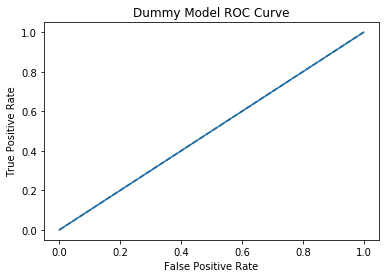

_______________________________
It takes 5.814 seconds for Logistic Regression fitting
Accuracy with Logistic Regressionon the testing set is: 0.812
PREDICTION     0  1  Total
TRUE                      
0           2150  0   2150
1            497  0    497
Total       2647  0   2647
              precision    recall  f1-score   support

           0       0.81      1.00      0.90      2150
           1       0.00      0.00      0.00       497

   micro avg       0.81      0.81      0.81      2647
   macro avg       0.41      0.50      0.45      2647
weighted avg       0.66      0.81      0.73      2647



C:\Users\Miles\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Miles\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Miles\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Miles\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


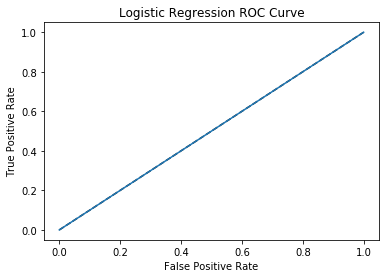

_______________________________
It takes 17.856 seconds for K Nearest Neighbors fitting
Accuracy with K Nearest Neighborson the testing set is: 0.824
PREDICTION     0    1  Total
TRUE                        
0           2065   85   2150
1            382  115    497
Total       2447  200   2647
              precision    recall  f1-score   support

           0       0.84      0.96      0.90      2150
           1       0.57      0.23      0.33       497

   micro avg       0.82      0.82      0.82      2647
   macro avg       0.71      0.60      0.61      2647
weighted avg       0.79      0.82      0.79      2647



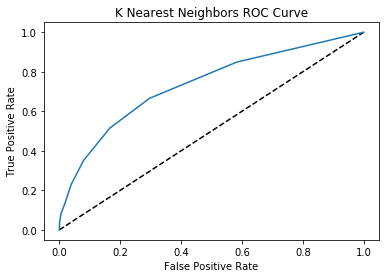

_______________________________
It takes 0.834 seconds for Decision Tree fitting
Accuracy with Decision Treeon the testing set is: 0.832
PREDICTION     0    1  Total
TRUE                        
0           2081   69   2150
1            377  120    497
Total       2458  189   2647
              precision    recall  f1-score   support

           0       0.85      0.97      0.90      2150
           1       0.63      0.24      0.35       497

   micro avg       0.83      0.83      0.83      2647
   macro avg       0.74      0.60      0.63      2647
weighted avg       0.81      0.83      0.80      2647



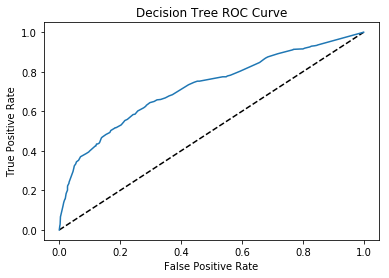

_______________________________
It takes 14.152 seconds for Random Forest fitting
Accuracy with Random Foreston the testing set is: 0.835
PREDICTION     0    1  Total
TRUE                        
0           2057   93   2150
1            344  153    497
Total       2401  246   2647
              precision    recall  f1-score   support

           0       0.86      0.96      0.90      2150
           1       0.62      0.31      0.41       497

   micro avg       0.83      0.83      0.83      2647
   macro avg       0.74      0.63      0.66      2647
weighted avg       0.81      0.83      0.81      2647



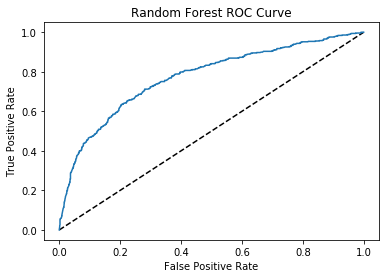

_______________________________
It takes 0.009 seconds for Naive Bayes fitting
Accuracy with Naive Bayeson the testing set is: 0.772
PREDICTION     0    1  Total
TRUE                        
0           1997  153   2150
1            451   46    497
Total       2448  199   2647
              precision    recall  f1-score   support

           0       0.82      0.93      0.87      2150
           1       0.23      0.09      0.13       497

   micro avg       0.77      0.77      0.77      2647
   macro avg       0.52      0.51      0.50      2647
weighted avg       0.71      0.77      0.73      2647



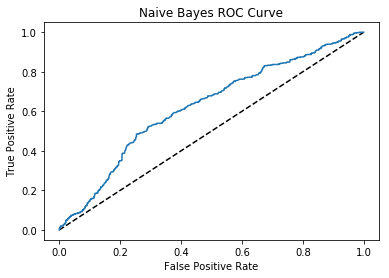

_______________________________
It takes 3.516 seconds for XGBoost fitting
Accuracy with XGBooston the testing set is: 0.827
PREDICTION     0    1  Total
TRUE                        
0           2060   90   2150
1            368  129    497
Total       2428  219   2647
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      2150
           1       0.59      0.26      0.36       497

   micro avg       0.83      0.83      0.83      2647
   macro avg       0.72      0.61      0.63      2647
weighted avg       0.80      0.83      0.80      2647



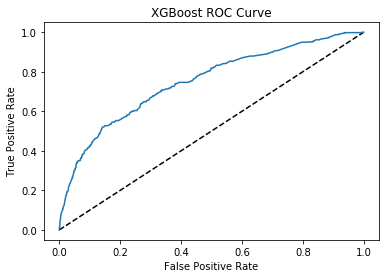

_______________________________


In [128]:
# add classifier to the preprocessor

# dummy model
if models_to_run['dm'] or run_all_models:
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                     ('classifier', classifier_dm)])
    dm_cv = train_and_score_model('Dummy Model', pipeline, param_grid_dm)


# logistical regression
if models_to_run['lr'] or run_all_models:
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                         ('classifier', classifier_lr)])
    lr_cv = train_and_score_model('Logistic Regression', pipeline, param_grid_lr)


# k nearest neighbors
if models_to_run['knn'] or run_all_models:
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                         ('classifier', classifier_knn)])
    knn_cv = train_and_score_model('K Nearest Neighbors', pipeline, param_grid_knn)


# support vector machine
if models_to_run['svm'] or run_all_models:
    print('The SVM pipeline takes over 2 hours to complete.')
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                         ('classifier', classifier_svm)])
    svm_cv = train_and_score_model('Support Vector Machine', pipeline, param_grid_svm)


# decision tree
if models_to_run['dt'] or run_all_models:
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                         ('classifier', classifier_dt)])
    dt_cv = train_and_score_model('Decision Tree', pipeline, param_grid_dt)


# random forest
if models_to_run['rf'] or run_all_models:
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                         ('classifier', classifier_rf)])
    rf_cv = train_and_score_model('Random Forest', pipeline, param_grid_rf)

# GaussianNB
if models_to_run['nb'] or run_all_models:
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                         ('classifier', classifier_nb)])
    nb_cv = train_and_score_model('Naive Bayes', pipeline, param_grid_nb)

# XGBoost
if models_to_run['xgb'] or run_all_models:
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', classifier_xgb)])
    xgb_cv = train_and_score_model('XGBoost', pipeline, param_grid_xgb)

### 6.8.3) Metrics

Accuracy (A)
- the number of correct predictions over the total number of predictions

Precision (P)
- the number of true positives over the number of true positives plus the number of false positives

Recall (R)
- the number of true positives over the number of true positives plus the number of false negatives

Area Under the Curve (AUC)
- the area under the Receiver Operating Characteristic (ROC) curve

In [129]:
raw_metrics = metrics.copy()
raw_metrics

,Dummy Model,Logistic Regression,K Nearest Neighbors,Support Vector Machine,Decision Tree,Random Forest,Naive Bayes,XGBoost
accuracy,0.81224,0.81224,0.823574,NaN,0.831507,0.834907,0.771817,0.826974
precision,0,0,0.575,NaN,0.634921,0.621951,0.231156,0.589041
recall,0,0,0.231388,NaN,0.241449,0.307847,0.0925553,0.259557
auc,0.5,0.5,0.734184,NaN,0.720198,0.772145,0.624125,0.748891
time to train,0.0120006,5.81433,17.856,NaN,0.834048,14.1518,0.0090003,3.5162


In [130]:
# convert scores into 0-100 and round to 3 sig figs

metrics = metrics.astype(float).round(3)
metrics = metrics.mul(100, axis=0)
metrics.loc['time to train',] = metrics.loc['time to train',].multiply(0.01)

metrics

,Dummy Model,Logistic Regression,K Nearest Neighbors,Support Vector Machine,Decision Tree,Random Forest,Naive Bayes,XGBoost
accuracy,81.200,81.200,82.400,NaN,83.200,83.500,77.200,82.700
precision,0.000,0.000,57.500,NaN,63.500,62.200,23.100,58.900
recall,0.000,0.000,23.100,NaN,24.100,30.800,9.300,26.000
auc,50.000,50.000,73.400,NaN,72.000,77.200,62.400,74.900
time to train,0.012,5.814,17.856,NaN,0.834,14.152,0.009,3.516


# Other Information and References